<a href="https://colab.research.google.com/github/zw2788/MECE4520_project/blob/main/MECE_4520_LaptopPrediction/test_0.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network

In [15]:
from typing import Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/zw2788/MECE4520_project/main/Laptop_Intel1012.csv")
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,CPU_benchmark,Ram,Ram_benchmark,Memory,Memory_benchmark,Gpu,GPU_benchmark,OpSys,Weight,Weight_benchmark,Price_euros
0,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,3397,12GB,12,1TB HDD,39.99,Intel HD Graphics 520,3.5,Windows 10,2.3kg,2.30,418.64
1,898,Asus,Rog GL753VD-GC082T,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,5092,12GB,12,128GB SSD + 1TB HDD,58.98,AMD Radeon R5 M430,3.1,Windows 10,1.90kg,1.90,817.95
2,45,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,5901,12GB,12,1TB HDD,39.99,Intel HD Graphics 520,3.5,Windows 10,1.86kg,1.86,469.00
3,399,Acer,Aspire 5,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,5901,12GB,12,1TB HDD,39.99,Intel HD Graphics 520,3.5,Windows 10,1.2kg,1.20,1535.00
4,476,Lenovo,Thinkpad T460s,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6600U 2.6GHz,3474,12GB,12,256GB SSD,22.99,Intel HD Graphics 6000,3.9,macOS,1.34kg,1.34,898.94


In [17]:
# We can choose the features needed here
features = [
    "GPU_benchmark",
    "Memory_benchmark",
    "CPU_benchmark",
    "Weight_benchmark",
    "Ram_benchmark"

]
label = "Price_euros"

# train test split, we can change the test_size to 0.2 or 0.1
X_raw, X_raw_test, Y, Y_test = train_test_split(data[features].values, data[label].values, test_size=0.3, random_state=42)


# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)
X_test = scaler.transform(X_raw_test)

# formatting
Y = Y.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

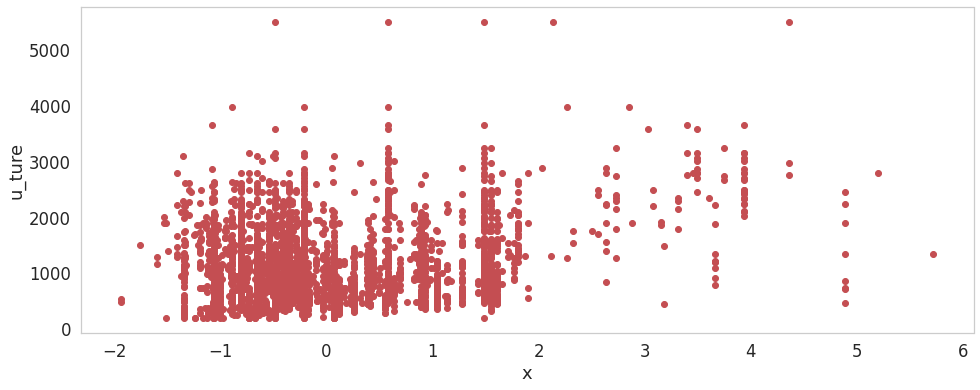

In [18]:
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(X, Y, 'ro')
axes.set_xlabel('x')
axes.set_ylabel('u_ture')
axes.grid()

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


model=Sequential([
    Dense(units=50,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=20,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=5,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=1,kernel_initializer='normal',activation='linear'),
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mse"])

history = model.fit(
    x=X,
    y=Y,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    verbose=1,
    shuffle=True,
)

Epoch 1/20
23/23 [==============================] - 1s 20ms/step - loss: 1722238.7500 - mse: 1722238.7500 - val_loss: 1793438.7500 - val_mse: 1793438.7500
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 1692495.5000 - mse: 1692495.5000 - val_loss: 1689428.8750 - val_mse: 1689428.8750
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 1375900.2500 - mse: 1375900.2500 - val_loss: 1002138.8125 - val_mse: 1002138.8125
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 546406.9375 - mse: 546406.9375 - val_loss: 426823.5938 - val_mse: 426823.5938
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 295995.3125 - mse: 295995.3125 - val_loss: 307166.5312 - val_mse: 307166.5312
Epoch 6/20
23/23 [==============================] - 0s 5ms/step - loss: 251842.7969 - mse: 251842.7969 - val_loss: 275156.0625 - val_mse: 275156.0625
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 232007.3281 - m

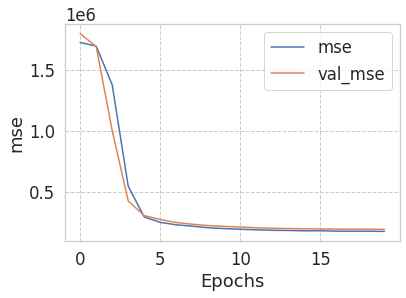

In [20]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mse')

In [21]:
yhat= model.predict(X_test)
model.summary()

10/10 [==============================] - 0s 2ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                300       
                                                                 
 dense_17 (Dense)            (None, 20)                1020      
                                                                 
 dense_18 (Dense)            (None, 5)                 105       
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


In [22]:
r2 = np.power(yhat - np.mean(Y_test), 2).sum() / np.power(Y_test - np.mean(Y_test), 2).sum()
r2

0.5400939246500231

GPU_NV

In [23]:
GPU_NV=pd.read_csv("https://raw.githubusercontent.com/zw2788/MECE4520_project/main/NV.csv")
GPU_NV.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,CPU_Benchmark,Ram,Memory,Memory_benchmark,Gpu,GPU_benchmark,OpSys,Weight,Price_euros
0,151,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 150MX,6.5,Windows 10,2.1kg,1145.00
1,1232,Asus,ROG Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 150MX,6.5,Windows 10,2.77kg,999.00
2,1251,MSI,GE72VR Apache,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 150MX,6.5,Windows 10,2.77kg,1549.00
3,306,Asus,Rog GL702VS-GC095T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 920,3.6,Linux,2.1kg,519.00
4,584,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,6933,32GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 920M,3.6,Windows 10,2.2kg,720.32


Epoch 1/20
12/12 [==============================] - 2s 48ms/step - loss: 2896414.7500 - mse: 2896414.7500 - val_loss: 3310006.2500 - val_mse: 3310006.2500
Epoch 2/20
12/12 [==============================] - 0s 25ms/step - loss: 2895110.7500 - mse: 2895110.7500 - val_loss: 3307147.7500 - val_mse: 3307147.7500
Epoch 3/20
12/12 [==============================] - 0s 23ms/step - loss: 2889286.7500 - mse: 2889286.7500 - val_loss: 3292721.5000 - val_mse: 3292721.5000
Epoch 4/20
12/12 [==============================] - 0s 15ms/step - loss: 2862571.5000 - mse: 2862571.5000 - val_loss: 3240421.7500 - val_mse: 3240421.7500
Epoch 5/20
12/12 [==============================] - 0s 18ms/step - loss: 2780314.7500 - mse: 2780314.7500 - val_loss: 3093741.2500 - val_mse: 3093741.2500
Epoch 6/20
12/12 [==============================] - 0s 38ms/step - loss: 2567942.0000 - mse: 2567942.0000 - val_loss: 2750812.0000 - val_mse: 2750812.0000
Epoch 7/20
12/12 [==============================] - 0s 26ms/step - los

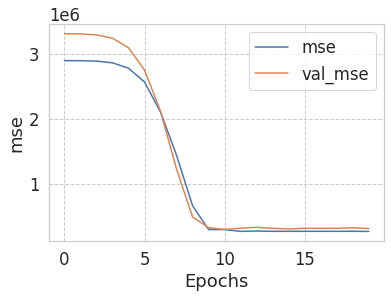

3/3 [==============================] - 0s 5ms/step


0.37558615455146854

In [10]:
features_GPU_NV = [
    "GPU_benchmark",

]
label = "Price_euros"

# train test split
X_raw_GPU_NV, X_raw_test_GPU_NV, Y_GPU_NV, Y_test_GPU_NV = train_test_split(GPU_NV[features_GPU_NV].values, GPU_NV[label].values, test_size=0.3, random_state=42)


# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw_GPU_NV)
X_GPU_NV = scaler.transform(X_raw_GPU_NV)
X_test_GPU_NV = scaler.transform(X_raw_test_GPU_NV)

# formatting
Y_GPU_NV = Y_GPU_NV.reshape((-1, 1))
Y_test_GPU_NV = Y_test_GPU_NV.reshape((-1, 1))

model_GPU_NV=Sequential([
    Dense(units=25,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=15,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=5,kernel_initializer='normal',activation='relu'),
    Dense(units=1,kernel_initializer='normal',activation='linear'),
])

model_GPU_NV.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mse"])

history_GPU_NV = model_GPU_NV.fit(
    x=X_GPU_NV,
    y=Y_GPU_NV,
    batch_size=16,
    epochs=20,
    validation_data=(X_test_GPU_NV, Y_test_GPU_NV),
    verbose=1,
    shuffle=True,
)

plot_history(history_GPU_NV, 'mse')
yhat_GPU_NV= model_GPU_NV.predict(X_test_GPU_NV)

r2_GPU_NV = np.power(yhat_GPU_NV - np.mean(Y_test_GPU_NV), 2).sum() / np.power(Y_test_GPU_NV - np.mean(Y_test_GPU_NV), 2).sum()
r2_GPU_NV

GPU_AMD

In [11]:
GPU_AMD=pd.read_csv("https://raw.githubusercontent.com/zw2788/MECE4520_project/main/NV.csv")
GPU_AMD.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,CPU_Benchmark,Ram,Memory,Memory_benchmark,Gpu,GPU_benchmark,OpSys,Weight,Price_euros
0,151,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 150MX,6.5,Windows 10,2.1kg,1145.00
1,1232,Asus,ROG Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 150MX,6.5,Windows 10,2.77kg,999.00
2,1251,MSI,GE72VR Apache,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 150MX,6.5,Windows 10,2.77kg,1549.00
3,306,Asus,Rog GL702VS-GC095T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6963,16GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 920,3.6,Linux,2.1kg,519.00
4,584,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,6933,32GB,256GB SSD + 1TB HDD,69.98,Nvidia GeForce 920M,3.6,Windows 10,2.2kg,720.32


Epoch 1/20
24/24 [==============================] - 1s 10ms/step - loss: 2895840.2500 - mse: 2895840.2500 - val_loss: 3307747.0000 - val_mse: 3307747.0000
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 2882233.0000 - mse: 2882233.0000 - val_loss: 3266266.5000 - val_mse: 3266266.5000
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 2757468.2500 - mse: 2757468.2500 - val_loss: 2982057.7500 - val_mse: 2982057.7500
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 2213732.2500 - mse: 2213732.2500 - val_loss: 2044341.6250 - val_mse: 2044341.6250
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 1083258.5000 - mse: 1083258.5000 - val_loss: 772579.5000 - val_mse: 772579.5000
Epoch 6/20
24/24 [==============================] - 0s 4ms/step - loss: 381295.1875 - mse: 381295.1875 - val_loss: 383234.5000 - val_mse: 383234.5000
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 280526.09

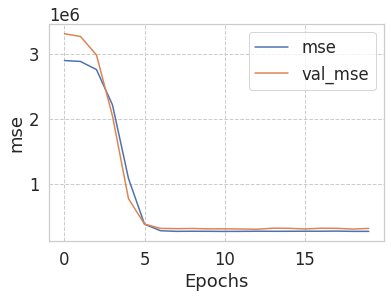

3/3 [==============================] - 0s 4ms/step


0.3693292853131214

In [12]:
features_GPU_AMD = [
    "GPU_benchmark",

]
label = "Price_euros"

# train test split
X_raw_GPU_AMD, X_raw_test_GPU_AMD, Y_GPU_AMD, Y_test_GPU_AMD = train_test_split(GPU_AMD[features_GPU_AMD].values, GPU_AMD[label].values, test_size=0.3, random_state=42)


# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw_GPU_AMD)
X_GPU_AMD = scaler.transform(X_raw_GPU_AMD)
X_test_GPU_AMD = scaler.transform(X_raw_test_GPU_AMD)

# formatting
Y_GPU_AMD = Y_GPU_AMD.reshape((-1, 1))
Y_test_GPU_AMD = Y_test_GPU_AMD.reshape((-1, 1))

model_GPU_AMD=Sequential([
    Dense(units=25,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=10,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=5,kernel_initializer='normal',activation='relu'),
    Dense(units=1,kernel_initializer='normal',activation='linear'),
])

model_GPU_AMD.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mse"])

history_GPU_AMD = model_GPU_AMD.fit(
    x=X_GPU_AMD,
    y=Y_GPU_AMD,
    batch_size=8,
    epochs=20,
    validation_data=(X_test_GPU_AMD, Y_test_GPU_AMD),
    verbose=1,
    shuffle=True,
)

plot_history(history_GPU_AMD, 'mse')
yhat_GPU_AMD= model_GPU_AMD.predict(X_test_GPU_AMD)

r2_GPU_AMD = np.power(yhat_GPU_AMD - np.mean(Y_test_GPU_AMD), 2).sum() / np.power(Y_test_GPU_AMD - np.mean(Y_test_GPU_AMD), 2).sum()
r2_GPU_AMD

GPU_Intel

In [13]:
GPU_Intel=pd.read_csv("https://raw.githubusercontent.com/zw2788/MECE4520_project/main/Intel.csv")
GPU_Intel.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,CPU_Benchmark,Ram,Memory,Memory_benchmark,Gpu,GPU_benchmark,OpSys,Weight,Price_euros
0,1274,Asus,Rog G752VT-GC073T,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6528,16GB,128GB SSD + 1TB HDD,58.98,Intel Graphics 620,3.9,Windows 10,1.8kg,919.0
1,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,2273,4GB,1TB HDD,39.99,Intel HD Graphics 400,1.1,Chrome OS,1.25kg,389.0
2,897,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,2273,4GB,1TB HDD,39.99,Intel HD Graphics 400,1.1,Chrome OS,1.5kg,325.0
3,910,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,2273,4GB,1TB HDD,39.99,Intel HD Graphics 400,1.1,No OS,1.86kg,299.0
4,979,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,2273,4GB,1TB HDD,39.99,Intel HD Graphics 400,1.1,Android,0.69kg,549.0


Epoch 1/20
54/54 [==============================] - 1s 6ms/step - loss: 1340052.6250 - mse: 1340052.6250 - val_loss: 1539058.2500 - val_mse: 1539058.2500
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 1160882.0000 - mse: 1160882.0000 - val_loss: 967104.8750 - val_mse: 967104.8750
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 391757.3438 - mse: 391757.3438 - val_loss: 390960.2188 - val_mse: 390960.2188
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 288338.1562 - mse: 288338.1562 - val_loss: 356040.9688 - val_mse: 356040.9688
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 264984.1875 - mse: 264984.1875 - val_loss: 319350.7188 - val_mse: 319350.7188
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 258596.8594 - mse: 258596.8594 - val_loss: 317596.4688 - val_mse: 317596.4688
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 255935.7812 - mse: 255

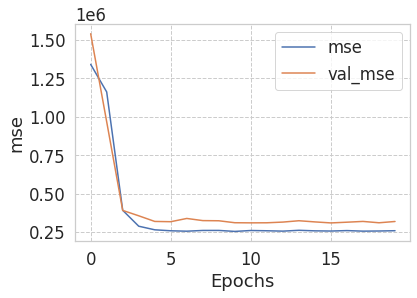

6/6 [==============================] - 0s 3ms/step


0.1681424955792871

In [14]:
features_GPU_Intel = [
    "GPU_benchmark",

]
label = "Price_euros"

# train test split
X_raw_GPU_Intel, X_raw_test_GPU_Intel, Y_GPU_Intel, Y_test_GPU_Intel = train_test_split(GPU_Intel[features_GPU_Intel].values, GPU_Intel[label].values, test_size=0.3, random_state=42)


# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw_GPU_Intel)
X_GPU_Intel = scaler.transform(X_raw_GPU_Intel)
X_test_GPU_Intel = scaler.transform(X_raw_test_GPU_Intel)

# formatting
Y_GPU_Intel = Y_GPU_Intel.reshape((-1, 1))
Y_test_GPU_Intel = Y_test_GPU_Intel.reshape((-1, 1))

model_GPU_Intel=Sequential([
    Dense(units=15,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=8,kernel_initializer='normal',activation='relu'),
    #Dropout(0.2),
    Dense(units=3,kernel_initializer='normal',activation='relu'),
    Dense(units=1,kernel_initializer='normal',activation='linear'),
])

model_GPU_Intel.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mse"])

history_GPU_Intel = model_GPU_Intel.fit(
    x=X_GPU_Intel,
    y=Y_GPU_Intel,
    batch_size=8,
    epochs=20,
    validation_data=(X_test_GPU_Intel, Y_test_GPU_Intel),
    verbose=1,
    shuffle=True,
)

plot_history(history_GPU_Intel, 'mse')
yhat_GPU_Intel= model_GPU_Intel.predict(X_test_GPU_Intel)

r2_GPU_Intel = np.power(yhat_GPU_Intel - np.mean(Y_test_GPU_Intel), 2).sum() / np.power(Y_test_GPU_Intel - np.mean(Y_test_GPU_Intel), 2).sum()
r2_GPU_Intel